In [ ]:
import os
import json
import glob

#Работу выполнила:
#Студентка 4 курса бакалавриата ЧОУ МУИВ
#группы ИСс 23.1/Б3-22
#Родникова Галина Антоновна 

def extract_semantics_from_jsonl():


    # извлекает все записи с field=semantics или field=syntax_semantics из всех jsonl файлов
    
    # результаты
    semantics_entries = []
    
    # ищет все jsonl файлы рекурсивно
    jsonl_files = glob.glob('./blimp-master/data**/*.jsonl', recursive=True)
    
    if not jsonl_files:
        print("не найдено .jsonl файлов")
        return
    
    print(f"найдено {len(jsonl_files)} файлов .jsonl")
    
    # обработка каждый файл
    for file_path in jsonl_files:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                for line_num, line in enumerate(f, 1):
                    line = line.strip()
                    if not line:  # пропуск пустых строк
                        continue
                    
                    try:
                        data = json.loads(line)
                        
                        # проверка поля field
                        if 'field' in data:
                            field_value = data['field']
                            if field_value in ['semantics', 'syntax_semantics']:
                                semantics_entries.append(data)
                    
                    except json.JSONDecodeError as e:
                        print(f"ошибка в файле {file_path}, строка {line_num}: {e}")
                        continue
        
        except Exception as e:
            print(f"ошибка при чтении файла {file_path}: {e}")
    
    # результаты
    if semantics_entries:
        output_file = 'all_semantics_entries.jsonl'
        with open(output_file, 'w', encoding='utf-8') as f:
            for entry in semantics_entries:
                f.write(json.dumps(entry, ensure_ascii=False) + '\n')
        
        print(f"сохранено {len(semantics_entries)} записей в файл: {output_file}")
        
        # статистика
        semantics_count = sum(1 for e in semantics_entries if e.get('field') == 'semantics')
        syntax_semantics_count = sum(1 for e in semantics_entries if e.get('field') == 'syntax_semantics')
        
        print(f"статистика:")
        print(f"semantics: {semantics_count} записей")
        print(f"syntax-semantics: {syntax_semantics_count} записей")
        
        # примеры
        if semantics_entries:
            print(f"\n примеры первых 3 записей:")
            for i, entry in enumerate(semantics_entries[:3], 1):
                print(f"\n{i}. UID: {entry.get('UID', 'N/A')}")
                print(f"field: {entry.get('field', 'N/A')}")
                print(f"good: {entry.get('sentence_good', 'N/A')[:50]}...")
                print(f"bad:  {entry.get('sentence_bad', 'N/A')[:50]}...")
    else:
        print("не найдено записей с field=semantics или field=syntax-semantics")

# запуск
if __name__ == "__main__":
    extract_semantics_from_jsonl()

найдено 67 файлов .jsonl
сохранено 22000 записей в файл: all_semantics_entries.jsonl
статистика:
semantics: 9000 записей
syntax-semantics: 13000 записей

 примеры первых 3 записей:

1. UID: superlative_quantifiers_2
field: semantics
good: The teenager does tour at most nine restaurants....
bad:  No teenager does tour at most nine restaurants....

2. UID: superlative_quantifiers_2
field: semantics
good: That car looks like at least seven prints....
bad:  No car looks like at least seven prints....

3. UID: superlative_quantifiers_2
field: semantics
good: The doctor brought at most eight gates....
bad:  No doctor brought at most eight gates....


основная информация
всего записей: 22000
количество столбцов: 17

структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sentence_good           22000 non-null  object
 1   sentence_bad            22000 non-null  object
 2   crucial_item            2000 non-null   object
 3   two_prefix_prefix_good  9000 non-null   object
 4   two_prefix_prefix_bad   9000 non-null   object
 5   two_prefix_word         9000 non-null   object
 6   field                   22000 non-null  object
 7   linguistics_term        22000 non-null  object
 8   UID                     22000 non-null  object
 9   simple_LM_method        22000 non-null  bool  
 10  one_prefix_method       22000 non-null  bool  
 11  two_prefix_method       22000 non-null  bool  
 12  lexically_identical     22000 non-null  bool  
 13  pairID                

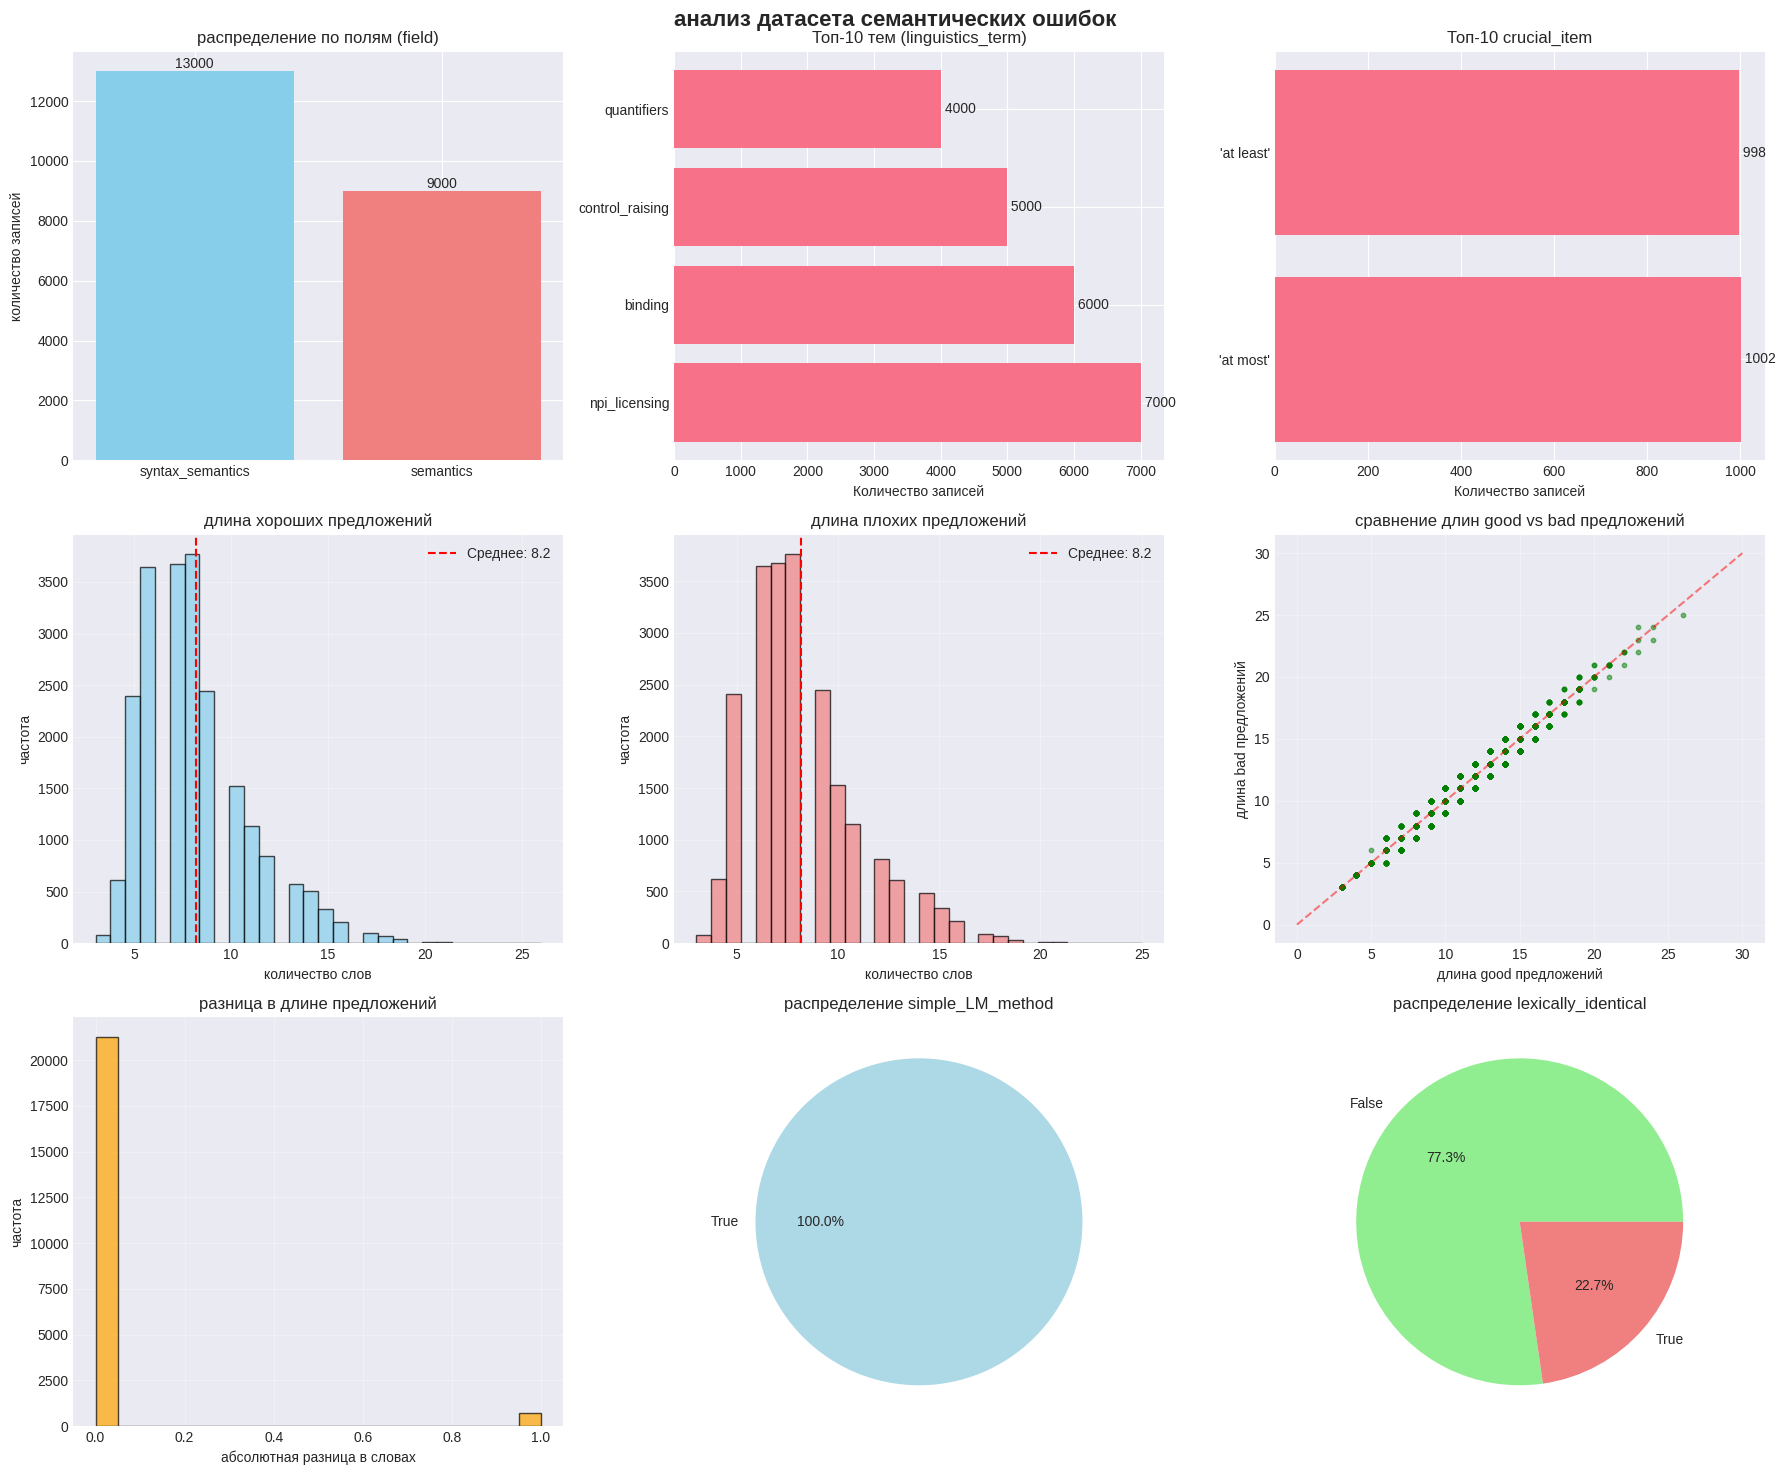


 
детальный анализ предложений
 

примеры пар предложений для разных linguistics_term:

тема: npi_licensing

 пример 0:
good: The associations that had worried Cynthia have not ever planned to shock every actress.
bad: The associations that had not worried Cynthia have ever planned to shock every actress.
crucial item: 'nan'
UID: sentential_negation_npi_scope

 пример 1:
good: Every son of Jerry who has insulted Jerry can not ever die.
bad: Every son of Jerry who has not insulted Jerry can ever die.
crucial item: 'nan'
UID: sentential_negation_npi_scope

тема: binding

 пример 0:
good: The teenagers explain that they aren't breaking all glasses.
bad: The teenagers explain that themselves aren't breaking all glasses.
crucial item: 'nan'
UID: principle_A_case_1

 пример 1:
good: Carl can't imagine that he complained about Lisa.
bad: Carl can't imagine that himself complained about Lisa.
crucial item: 'nan'
UID: principle_A_case_1

тема: control_raising

 пример 0:
good: There is soon to

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import numpy as np

# стиль для графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# загрузка данных
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

df = load_data('all_semantics_entries.jsonl')

print("основная информация")
print(f"всего записей: {len(df)}")
print(f"количество столбцов: {len(df.columns)}")
print(f"\nструктура данных:")
print(df.info())
print(f"\nпервые 5 записей:")
print(df.head())

print("\n" + " ")
print("статистика по полям")
print(" ")

# анализ распределения по полям
field_distribution = df['field'].value_counts()
print("\n1. распределение по полям:")
for field, count in field_distribution.items():
    print(f"{field}: {count} записей ({count/len(df)*100:.1f}%)")

# анализ уникальных значений в ключевых столбцах
print("\n2. уникальные значения:")
print(f"   уникальных UID: {df['UID'].nunique()}")
print(f"   уникальных linguistics_term: {df['linguistics_term'].nunique()}")
print(f"   уникальных crucial_item: {df['crucial_item'].nunique()}")

# статистика по булевым полям
print("\n3. булевые поля:")
bool_columns = ['simple_LM_method', 'one_prefix_method', 'two_prefix_method', 'lexically_identical']
for col in bool_columns:
    if col in df.columns:
        # преобразование в булевый тип на случай, если это строки
        if df[col].dtype == 'object':
            bool_series = df[col].apply(lambda x: str(x).lower() in ['true', '1', 'yes', 't'])
        else:
            bool_series = df[col]
        
        true_count = bool_series.sum()
        false_count = len(df) - true_count
        print(f"{col}: True={true_count} ({true_count/len(df)*100:.1f}%), "
              f"false={false_count} ({false_count/len(df)*100:.1f}%)")

print("\n" + " ")
print("анализ тематик (linguistics_term)")
print(" ")

# анализ linguistics_term
linguistics_counts = df['linguistics_term'].value_counts()
print(f"\n топ-10 тем по linguistics_term:")
for term, count in linguistics_counts.head(10).items():
    print(f"{term}: {count} записей ({count/len(df)*100:.1f}%)")

# анализ распределения UID по темам
print(f"\nраспределение UID по темам:")
uid_by_term = df.groupby('linguistics_term')['UID'].nunique().sort_values(ascending=False)
for term, uid_count in uid_by_term.head(10).items():
    total_records = linguistics_counts[term]
    print(f"{term}: {uid_count} UID, {total_records} записей "
          f"(в среднем {total_records/uid_count:.1f} записей на UID)")

print("\n" + " ")
print("анализ crucial_item")
print(" ")

# анализ crucial_item
crucial_counts = df['crucial_item'].value_counts()
print(f"\n топ-10 crucial_item:")
for item, count in crucial_counts.head(10).items():
    print(f"'{item}': {count} записей ({count/len(df)*100:.1f}%)")

# анализ длины предложений
print("\n" + " ")
print("анализ длины проедложений")
print(" ")

df['good_sentence_length'] = df['sentence_good'].apply(lambda x: len(x.split()))
df['bad_sentence_length'] = df['sentence_bad'].apply(lambda x: len(x.split()))
df['length_diff'] = abs(df['good_sentence_length'] - df['bad_sentence_length'])

print(f"\n статистика длины предложений:")
print(f"good sentences: средняя длина = {df['good_sentence_length'].mean():.1f} слов, "
      f"std = {df['good_sentence_length'].std():.1f}")
print(f"bad sentences: средняя длина = {df['bad_sentence_length'].mean():.1f} слов, "
      f"std = {df['bad_sentence_length'].std():.1f}")
print(f"максимальная разница в длине: {df['length_diff'].max()} слов")
print(f"записи с одинаковой длиной: {(df['length_diff'] == 0).sum()} "
      f"({(df['length_diff'] == 0).sum()/len(df)*100:.1f}%)")

# графики
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('анализ датасета семантических ошибок', fontsize=16, fontweight='bold')

# распределение по полям
axes[0, 0].bar(field_distribution.index, field_distribution.values, color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('распределение по полям (field)')
axes[0, 0].set_ylabel('количество записей')
for i, v in enumerate(field_distribution.values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom')

#  топ-10 linguistics_term
top_terms = linguistics_counts.head(10)
bars = axes[0, 1].barh(range(len(top_terms)), top_terms.values)
axes[0, 1].set_yticks(range(len(top_terms)))
axes[0, 1].set_yticklabels(top_terms.index)
axes[0, 1].set_title('Топ-10 тем (linguistics_term)')
axes[0, 1].set_xlabel('Количество записей')
for i, v in enumerate(top_terms.values):
    axes[0, 1].text(v, i, f' {v}', va='center')

# топ-10 crucial_item
top_items = crucial_counts.head(10)
bars = axes[0, 2].barh(range(len(top_items)), top_items.values)
axes[0, 2].set_yticks(range(len(top_items)))
axes[0, 2].set_yticklabels([f"'{x}'" for x in top_items.index])
axes[0, 2].set_title('Топ-10 crucial_item')
axes[0, 2].set_xlabel('Количество записей')
for i, v in enumerate(top_items.values):
    axes[0, 2].text(v, i, f' {v}', va='center')

# распределение длины хороших предложений
axes[1, 0].hist(df['good_sentence_length'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(df['good_sentence_length'].mean(), color='red', linestyle='--', 
                   label=f'Среднее: {df["good_sentence_length"].mean():.1f}')
axes[1, 0].set_title('длина хороших предложений')
axes[1, 0].set_xlabel('количество слов')
axes[1, 0].set_ylabel('частота')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# распределение длины плохих предложений
axes[1, 1].hist(df['bad_sentence_length'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 1].axvline(df['bad_sentence_length'].mean(), color='red', linestyle='--', 
                   label=f'Среднее: {df["bad_sentence_length"].mean():.1f}')
axes[1, 1].set_title('длина плохих предложений')
axes[1, 1].set_xlabel('количество слов')
axes[1, 1].set_ylabel('частота')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# сравнение длин предложений
axes[1, 2].scatter(df['good_sentence_length'], df['bad_sentence_length'], 
                   alpha=0.5, s=10, color='green')
axes[1, 2].plot([0, 30], [0, 30], 'r--', alpha=0.5)  # Линия y=x
axes[1, 2].set_title('сравнение длин good vs bad предложений')
axes[1, 2].set_xlabel('длина good предложений')
axes[1, 2].set_ylabel('длина bad предложений')
axes[1, 2].grid(True, alpha=0.3)

# распределение разницы в длине
axes[2, 0].hist(df['length_diff'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[2, 0].set_title('разница в длине предложений')
axes[2, 0].set_xlabel('абсолютная разница в словах')
axes[2, 0].set_ylabel('частота')
axes[2, 0].grid(True, alpha=0.3)

# распределение по булевым полям (simple_LM_method)
if 'simple_LM_method' in df.columns:
    
    if df['simple_LM_method'].dtype == 'object':
        lm_series = df['simple_LM_method'].apply(lambda x: str(x).lower() in ['true', '1', 'yes', 't'])
    else:
        lm_series = df['simple_LM_method']
    
    lm_counts = lm_series.value_counts()
    print(f"\nDEBUG: simple_LM_method value counts: {lm_counts}")
    
    if len(lm_counts) > 0:
        # данные для круговой диаграммы
        labels = [str(label) for label in lm_counts.index]
        sizes = lm_counts.values
        colors = ['lightgreen', 'lightcoral'] if len(lm_counts) == 2 else ['lightblue']
        
        axes[2, 1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors[:len(labels)])
        axes[2, 1].set_title('распределение simple_LM_method')
    else:
        axes[2, 1].text(0.5, 0.5, 'нет данных', ha='center', va='center')
        axes[2, 1].set_title('распределение simple_LM_method')
        axes[2, 1].set_xticks([])
        axes[2, 1].set_yticks([])

# распределение по булевым полям (lexically_identical)
if 'lexically_identical' in df.columns:
    # преобразуем к булевому типу для корректного подсчета
    if df['lexically_identical'].dtype == 'object':
        lex_series = df['lexically_identical'].apply(lambda x: str(x).lower() in ['true', '1', 'yes', 't'])
    else:
        lex_series = df['lexically_identical']
    
    lex_counts = lex_series.value_counts()
    print(f"DEBUG: lexically_identical value counts: {lex_counts}")
    
    if len(lex_counts) > 0:
        # данные для круговой диаграммы
        labels = [str(label) for label in lex_counts.index]
        sizes = lex_counts.values
        colors = ['lightgreen', 'lightcoral'] if len(lex_counts) == 2 else ['lightblue']
        
        axes[2, 2].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors[:len(labels)])
        axes[2, 2].set_title('распределение lexically_identical')
    else:
        axes[2, 2].text(0.5, 0.5, 'нет данных', ha='center', va='center')
        axes[2, 2].set_title('распределение lexically_identical')
        axes[2, 2].set_xticks([])
        axes[2, 2].set_yticks([])

plt.tight_layout()
plt.show()

print("\n" + " ")
print("детальный анализ предложений")
print(" ")

# анализ примеров предложений
print("\nпримеры пар предложений для разных linguistics_term:")
sample_terms = linguistics_counts.head(3).index

for term in sample_terms:
    term_df = df[df['linguistics_term'] == term].head(2)
    print(f"\nтема: {term}")
    for idx, row in term_df.iterrows():
        print(f"\n пример {row['pairID']}:")
        print(f"good: {row['sentence_good']}")
        print(f"bad: {row['sentence_bad']}")
        print(f"crucial item: '{row['crucial_item']}'")
        print(f"UID: {row['UID']}")

print("\n" + " ")
print("корелляционный анализ")
print("=" * 80)

# числовые представления для анализа
df_numeric = df.copy()

# категориальные признаки
if 'field' in df.columns:
    df_numeric['field_numeric'] = df_numeric['field'].map({'semantics': 0, 'syntax-semantics': 1})

# вычисление корреляции
numeric_columns = ['good_sentence_length', 'bad_sentence_length', 'length_diff']
if 'field_numeric' in df_numeric.columns:
    numeric_columns.append('field_numeric')

correlation_matrix = df_numeric[numeric_columns].corr()

print("\nматрица корреляций:")
print(correlation_matrix)

print("\n" + " ")
print("анализ распредения по UID")
print("=" )

uid_counts = df['UID'].value_counts()
print(f"\nстатистика по UID:")
print(f"всего уникальных UID: {len(uid_counts)}")
print(f"среднее записей на UID: {uid_counts.mean():.1f}")
print(f"медиана записей на UID: {uid_counts.median():.1f}")
print(f"стандартное отклонение: {uid_counts.std():.1f}")
print(f"минимальное количество: {uid_counts.min()}")
print(f"максимальное количество: {uid_counts.max()}")

print(f"\n топ-5 самых частых UID:")
for uid, count in uid_counts.head(5).items():
    print(f"{uid}: {count} записей")

print(f"\n топ-5 самых редких UID:")
for uid, count in uid_counts.tail(5).items():
    print(f"{uid}: {count} записей")

# анализ паттернов в предложениях
print("\n" + " ")
print("анализ патернов")
print(" ")

# наиболее частые префиксы
print("\nанализ префиксов (первые 3 слова):")
df['good_prefix'] = df['sentence_good'].apply(lambda x: ' '.join(x.split()[:3]))
df['bad_prefix'] = df['sentence_bad'].apply(lambda x: ' '.join(x.split()[:3]))

good_prefix_counts = df['good_prefix'].value_counts().head(5)
bad_prefix_counts = df['bad_prefix'].value_counts().head(5)

print("\nтоп-5 префиксов в хороших предложениях:")
for prefix, count in good_prefix_counts.items():
    print(f"   '{prefix}...': {count} записей")

print("\nтоп-5 префиксов в плохих предложениях:")
for prefix, count in bad_prefix_counts.items():
    print(f"   '{prefix}...': {count} записей")

# анализ изменений между good и bad предложениями
print("\nанализ наиболее частых изменений:")
# простой анализ: находим слова, которые отличаются
def find_differences(good_sent, bad_sent):
    good_words = set(good_sent.lower().split())
    bad_words = set(bad_sent.lower().split())
    return good_words - bad_words, bad_words - good_words

df['added_words'] = df.apply(lambda row: find_differences(row['sentence_bad'], row['sentence_good'])[0], axis=1)
df['removed_words'] = df.apply(lambda row: find_differences(row['sentence_good'], row['sentence_bad'])[0], axis=1)

# статистика по добавленным словам
all_added = []
for words in df['added_words']:
    all_added.extend(words)

added_counts = Counter(all_added).most_common(10)
print("\nТоп-10 самых часто добавляемых слов:")
for word, count in added_counts:
    print(f"'{word}': {count} раз")

# статистика по удаленным словам
all_removed = []
for words in df['removed_words']:
    all_removed.extend(words)

removed_counts = Counter(all_removed).most_common(10)
print("\nтоп-10 самых часто удаляемых слов:")
for word, count in removed_counts:
    print(f"   '{word}': {count} раз")

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import json
import math
import random
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# установка seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# проверка GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"устройство: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"память: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} gb")

устройство: cuda
GPU: NVIDIA GeForce RTX 3060
память: 11.6 gb


In [4]:
def load_all_data(file_path='all_semantics_entries.jsonl'):

    print("Загрузка данных")
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    
    df = pd.DataFrame(data)
    print(f"загружено {len(df)} записей")
    
    # очистка
    df = df.dropna(subset=['sentence_good', 'sentence_bad'])

    # разделение
    train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)  # 80% train
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 10% val, 10% test
    
    print(f"train: {len(train_df)} записей")
    print(f"val: {len(val_df)} записей")
    print(f"test: {len(test_df)} записей")
    
    return train_df, val_df, test_df

train_df, val_df, test_df = load_all_data()

Загрузка данных
загружено 22000 записей
train: 17600 записей
val: 2200 записей
test: 2200 записей


In [10]:
class ImprovedTokenizer:
    
    #токенизатор
    
    def __init__(self, vocab_size=20000):
        self.vocab_size = vocab_size
        self.word2idx = {}
        self.idx2word = {}
        self.special_tokens = {
            '[PAD]': 0,
            '[UNK]': 1,
            '[CLS]': 2,
            '[SEP]': 3,
            '[MASK]': 4
        }
        
    def build_vocab(self, sentences, min_freq=2):
        print("построение улучшенного словаря")
        
        word_freq = Counter()
        for sentence in tqdm(sentences, desc="анализ слов"):
            words = self._preprocess(sentence).split()
            word_freq.update(words)
        
        # фильтрация по минимальной частоте
        filtered_words = {word: freq for word, freq in word_freq.items() if freq >= min_freq}
        print(f"Слов с частотой >= {min_freq}: {len(filtered_words)}")
        
        # самые частые слова
        most_common = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)
        most_common = most_common[:self.vocab_size - len(self.special_tokens)]
        
        # словарь
        self.word2idx = self.special_tokens.copy()
        
        # добавка обычные слова
        start_idx = len(self.special_tokens)
        for i, (word, _) in enumerate(most_common):
            self.word2idx[word] = start_idx + i
        
        # обратный словарь
        self.idx2word = {idx: word for word, idx in self.word2idx.items()}
        
        print(f"Словарь построен. Размер: {len(self.word2idx)} слов")
        
    def _preprocess(self, text):
        
        #Предобработка текста
        text = text.lower().strip()
        text = ' '.join(text.split())
        return text
    
    def tokenize(self, text):
        
        #Токенизация
        text = self._preprocess(text)
        words = text.split()
        return ['[CLS]'] + words + ['[SEP]']
    
    def encode(self, text, max_length=128):
        
        #Кодирование в индексы
        tokens = self.tokenize(text)
        
        if len(tokens) > max_length:
            tokens = tokens[:max_length-1] + ['[SEP]']
        
        indices = []
        for token in tokens:
            if token in self.word2idx:
                indices.append(self.word2idx[token])
            else:
                indices.append(self.word2idx['[UNK]'])
        
        if len(indices) < max_length:
            pad_len = max_length - len(indices)
            indices = indices + [self.word2idx['[PAD]']] * pad_len
        
        # маска внимания
        attention_mask = [1 if idx != self.word2idx['[PAD]'] else 0 for idx in indices]
        
        return {
            'input_ids': torch.tensor(indices, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long)
        }
    
    def get_vocab_size(self):
        return len(self.word2idx)

In [11]:
class PositionalEncoding(nn.Module):

    #позиционное кодирование в Transformer
    
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class ImprovedTransformerEncoder(nn.Module):
    # transformer энкодер
    
    def __init__(self, vocab_size, d_model=256, nhead=8, num_layers=6, dim_feedforward=1024, dropout=0.1, max_len=512):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len)
        self.dropout = nn.Dropout(dropout)
        
        # слои transformer 
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        
        self.layer_norm = nn.LayerNorm(d_model)
        
        
        self._init_weights()
    
    def _init_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)
    
    def forward(self, src, src_mask=None):
        # embedding
        src_emb = self.embedding(src) * math.sqrt(self.embedding.embedding_dim)
        src_emb = self.pos_encoder(src_emb)
        src_emb = self.dropout(src_emb)
        
        # transformer
        output = self.transformer(src_emb, src_key_padding_mask=src_mask)
        output = self.layer_norm(output)
        
        return output

class AdvancedContrastiveModel(nn.Module):

    # модель для контрастивного обучения
    
    def __init__(self, vocab_size, d_model=256, projection_dim=128):
        super().__init__()
        
        # encoder
        self.encoder = ImprovedTransformerEncoder(
            vocab_size=vocab_size,
            d_model=d_model,
            nhead=8,
            num_layers=4,
            dim_feedforward=d_model * 4
        )
        
        # pooling
        self.pooling = nn.Sequential(
            nn.Linear(d_model, d_model * 2),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(d_model * 2, projection_dim)
        )
        
        # нормализация выходных эмбеддингов
        self.output_norm = nn.LayerNorm(projection_dim)
        
        print(f"модель создана, параметры: {sum(p.numel() for p in self.parameters()):,}")
    
    def forward(self, input_ids, attention_mask=None):
        
        # маска для padding
        if attention_mask is not None:
            key_padding_mask = (attention_mask == 0)
        else:
            key_padding_mask = None
        
        # encoder
        encoder_output = self.encoder(input_ids, key_padding_mask)
        
        # mean pooling (исключая padding)
        if key_padding_mask is not None:
            padding_mask = ~key_padding_mask.unsqueeze(-1)
            sum_embeddings = torch.sum(encoder_output * padding_mask, dim=1)
            num_tokens = padding_mask.sum(dim=1)
            pooled = sum_embeddings / torch.clamp(num_tokens, min=1e-9)
        else:
            pooled = torch.mean(encoder_output, dim=1)
        
        # projection
        projected = self.pooling(pooled)
        
        # нормализация
        normalized = F.normalize(projected, p=2, dim=1)
        
        return normalized

In [12]:
class AugmentedContrastiveDataset(Dataset):
    
    #датасет с аугментацией данных
    
    def __init__(self, df, tokenizer, max_length=128, mode='train', augment=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.mode = mode
        self.augment = augment and mode == 'train'
        
        # все предложения для поиска похожих
        self.all_good = list(self.df['sentence_good'])
        self.all_bad = list(self.df['sentence_bad'])
        
        # группировка по UID для сложных негативов
        self.uid_to_indices = {}
        for idx, uid in enumerate(self.df['UID']):
            if uid not in self.uid_to_indices:
                self.uid_to_indices[uid] = []
            self.uid_to_indices[uid].append(idx)
        
        print(f"загружено {len(self.df)} пар в режиме {mode}")
        
        if mode == 'train':
            # строим словарь 
            all_sentences = self.all_good + self.all_bad
            tokenizer.build_vocab(all_sentences, min_freq=2)
    
    def _augment_sentence(self, sentence):
        words = sentence.lower().split()
        if len(words) <= 3:
            return sentence
        
        # случайно удаляются несущественные слова с вероятностью 20%, но не первые и последние
        if random.random() < 0.2 and len(words) > 4:
            idx = random.randint(1, len(words) - 2)
            words.pop(idx)
        
        # случайно меняеются порядок соседних слов с вероятностью 15%
        if random.random() < 0.15 and len(words) > 3:
            i = random.randint(0, len(words) - 2)
            words[i], words[i+1] = words[i+1], words[i]
        
        return ' '.join(words)
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # anchor - хорошее предложение 
        anchor = row['sentence_good']
        if self.augment:
            anchor = self._augment_sentence(anchor)
        
        # positive - другое хорошее предложение ИЗ ТОЙ ЖЕ ТЕМЫ
        uid = row['UID']
        same_uid_indices = self.uid_to_indices.get(uid, [idx])
        
        positive_idx = random.choice(same_uid_indices)
        while positive_idx == idx and len(same_uid_indices) > 1:
            positive_idx = random.choice(same_uid_indices)
        
        positive = self.df.iloc[positive_idx]['sentence_good']
        if self.augment:
            positive = self._augment_sentence(positive)
        
        # negative - плохое предложение из той же пары
        negative = row['sentence_bad']
        
        # hard negative: плохое предложение из ДРУГОЙ темы
        if random.random() < 0.3: 
            other_uids = [u for u in self.uid_to_indices.keys() if u != uid]
            if other_uids:
                hard_uid = random.choice(other_uids)
                hard_idx = random.choice(self.uid_to_indices[hard_uid])
                negative = self.df.iloc[hard_idx]['sentence_bad']
        
        # токенизация
        anchor_enc = self.tokenizer.encode(anchor, self.max_length)
        positive_enc = self.tokenizer.encode(positive, self.max_length)
        negative_enc = self.tokenizer.encode(negative, self.max_length)
        
        return {
            'anchor_ids': anchor_enc['input_ids'],
            'anchor_mask': anchor_enc['attention_mask'],
            'positive_ids': positive_enc['input_ids'],
            'positive_mask': positive_enc['attention_mask'],
            'negative_ids': negative_enc['input_ids'],
            'negative_mask': negative_enc['attention_mask'],
            'linguistics_term': row['linguistics_term'],
            'uid': uid
        }

print("\nсоздание улучшенного токенизатора и датасетов")
tokenizer = ImprovedTokenizer(vocab_size=15000)

train_dataset = AugmentedContrastiveDataset(
    train_df, tokenizer, max_length=64, mode='train', augment=True
)
val_dataset = AugmentedContrastiveDataset(
    val_df, tokenizer, max_length=64, mode='val', augment=False
)
test_dataset = AugmentedContrastiveDataset(
    test_df, tokenizer, max_length=64, mode='test', augment=False
)

print(f"train dataset: {len(train_dataset)} примеров")
print(f"val dataset: {len(val_dataset)} примеров")
print(f"test dataset: {len(test_dataset)} примеров")


создание улучшенного токенизатора и датасетов
загружено 17600 пар в режиме train
построение улучшенного словаря


анализ слов: 100%|██████████| 35200/35200 [00:00<00:00, 643727.30it/s]

Слов с частотой >= 2: 3318
Словарь построен. Размер: 3323 слов
загружено 2200 пар в режиме val
загружено 2200 пар в режиме test
train dataset: 17600 примеров
val dataset: 2200 примеров
test dataset: 2200 примеров


In [13]:
import warnings

warnings.filterwarnings('ignore')

class ImprovedTrainer:

     # тренер с лучшими практиками
    
    def __init__(self, model, train_loader, val_loader, device, 
                 learning_rate=1e-3, warmup_steps=1000):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        
        self.triplet_loss = nn.TripletMarginLoss(margin=0.5, p=2)
        
        self.contrastive_loss = nn.CosineEmbeddingLoss(margin=0.5)
        
        self.optimizer = torch.optim.AdamW(
            model.parameters(),
            lr=learning_rate,
            weight_decay=0.01,
            betas=(0.9, 0.999)
        )
        
        self.scheduler = torch.optim.lr_scheduler.OneCycleLR(
            self.optimizer,
            max_lr=learning_rate,
            epochs=20,
            steps_per_epoch=len(train_loader),
            pct_start=0.1
        )
        
        self.grad_accum_steps = 4
        
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': [],
            'lr': []
        }
    
    def compute_accuracy(self, anchor, positive, negative):

        #вычисление accuracy с косинусным сходством
        pos_sim = F.cosine_similarity(anchor, positive)
        neg_sim = F.cosine_similarity(anchor, negative)
        
        # positive должен быть ближе чем negative
        correct = (pos_sim > neg_sim).float().mean().item()
        return correct
    
    def train_epoch(self, epoch):

        self.model.train()
        total_loss = 0
        total_acc = 0
        num_batches = 0
        
        progress_bar = tqdm(self.train_loader, desc=f'Training Epoch {epoch}')
        self.optimizer.zero_grad()
        
        for batch_idx, batch in enumerate(progress_bar):
            # перемещение на устройство
            anchor_ids = batch['anchor_ids'].to(self.device)
            anchor_mask = batch['anchor_mask'].to(self.device)
            
            positive_ids = batch['positive_ids'].to(self.device)
            positive_mask = batch['positive_mask'].to(self.device)
            
            negative_ids = batch['negative_ids'].to(self.device)
            negative_mask = batch['negative_mask'].to(self.device)
            
            anchor_emb = self.model(anchor_ids, anchor_mask)
            positive_emb = self.model(positive_ids, positive_mask)
            negative_emb = self.model(negative_ids, negative_mask)
            
            loss_triplet = self.triplet_loss(anchor_emb, positive_emb, negative_emb)
            
            loss_contrastive = self.contrastive_loss(
                anchor_emb, negative_emb,
                torch.tensor([-1], device=device).expand(anchor_emb.size(0))
            )
            
            # loss
            loss = loss_triplet + 0.5 * loss_contrastive
            
            loss = loss / self.grad_accum_steps
            loss.backward()
            
            # аccuracy
            acc = self.compute_accuracy(anchor_emb, positive_emb, negative_emb)
            
            # обновление весов каждые grad_accum_steps шагов
            if (batch_idx + 1) % self.grad_accum_steps == 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.grad_accum_steps
            total_acc += acc
            num_batches += 1
            
            # обновление progress bar
            current_lr = self.optimizer.param_groups[0]['lr']
            progress_bar.set_postfix({
                'loss': loss.item() * self.grad_accum_steps,
                'acc': acc,
                'lr': f'{current_lr:.2e}'
            })
        
        return total_loss / num_batches, total_acc / num_batches
    
    def validate(self):
        self.model.eval()
        total_loss = 0
        total_acc = 0
        num_batches = 0
        
        with torch.no_grad():
            progress_bar = tqdm(self.val_loader, desc='Validation')
            
            for batch in progress_bar:
                anchor_ids = batch['anchor_ids'].to(self.device)
                anchor_mask = batch['anchor_mask'].to(self.device)
                
                positive_ids = batch['positive_ids'].to(self.device)
                positive_mask = batch['positive_mask'].to(self.device)
                
                negative_ids = batch['negative_ids'].to(self.device)
                negative_mask = batch['negative_mask'].to(self.device)
                
                # forward
                anchor_emb = self.model(anchor_ids, anchor_mask)
                positive_emb = self.model(positive_ids, positive_mask)
                negative_emb = self.model(negative_ids, negative_mask)
                
                # loss
                loss = self.triplet_loss(anchor_emb, positive_emb, negative_emb)
                
                # accuracy
                acc = self.compute_accuracy(anchor_emb, positive_emb, negative_emb)
                
                total_loss += loss.item()
                total_acc += acc
                num_batches += 1
                
                progress_bar.set_postfix({
                    'loss': loss.item(),
                    'acc': acc
                })
        
        return total_loss / num_batches, total_acc / num_batches
    
    def train(self, num_epochs=20):

        print(f"\nначало обучения на {num_epochs} эпох")
        print(f"размер словаря: {tokenizer.get_vocab_size()}")
        print(f"размер train loader: {len(self.train_loader)} батчей")
        print(f"размер val loader: {len(self.val_loader)} батчей")
        
        best_val_acc = 0
        patience = 5
        patience_counter = 0
        
        for epoch in range(num_epochs):
            print(f"\n{' '}")
            print(f"эпоха {epoch+1}/{num_epochs}")
            print(f"{' '}")
            
            # обучение
            train_loss, train_acc = self.train_epoch(epoch + 1)
            
            # валидация
            val_loss, val_acc = self.validate()
            
            # сохранение истории
            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_acc)
            self.history['lr'].append(self.optimizer.param_groups[0]['lr'])
            
            # вывод
            print(f"\nрезультаты эпохи {epoch+1}:")
            print(f"train Loss: {train_loss:.4f}, train Acc: {train_acc:.4f}")
            print(f"val Loss: {val_loss:.4f}, val Acc: {val_acc:.4f}")
            print(f"learning Rate: {self.optimizer.param_groups[0]['lr']:.2e}")
            
            # cохранение лучшей модели
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
                
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'scheduler_state_dict': self.scheduler.state_dict(),
                    'val_acc': val_acc,
                    'val_loss': val_loss,
                    'history': self.history,
                    'tokenizer': tokenizer
                }, 'best_improved_model.pth')
                
                print(f"модель сохранена! Новый лучший accuracy: {val_acc:.4f}")
            else:
                patience_counter += 1
                print(f"аccuracy не улучшилась. Patience: {patience_counter}/{patience}")
            
            # Ранняя остановка
            if patience_counter >= patience:
                print(f"\nранняя остановка на эпохе {epoch+1}")
                break
        
        print(f"\n{'-'*60}")
        print(f"обучение завершено!")
        print(f"лучшая валидационная accuracy: {best_val_acc:.4f}")
        
        return self.history

batch_size = 64  
train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,
    num_workers=2,
    pin_memory=True
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=2,
    pin_memory=True
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# создние модели
vocab_size = tokenizer.get_vocab_size()
model = AdvancedContrastiveModel(
    vocab_size=vocab_size,
    d_model=192,  
    projection_dim=96
).to(device)

print("\nсоздание улучшенного тренера")
trainer = ImprovedTrainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    learning_rate=3e-4,
    warmup_steps=500
)


history = trainer.train(num_epochs=15)

модель создана, параметры: 2,529,120

создание улучшенного тренера

начало обучения на 15 эпох
размер словаря: 3323
размер train loader: 275 батчей
размер val loader: 35 батчей

 
эпоха 1/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 90.90it/s, loss=0.678, acc=0.208] 



результаты эпохи 1:
train Loss: 0.5569, train Acc: 0.4192
val Loss: 0.6887, val Acc: 0.2368
learning Rate: 2.28e-05
модель сохранена! Новый лучший accuracy: 0.2368

 
эпоха 2/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 107.06it/s, loss=0.61, acc=0.25]  



результаты эпохи 2:
train Loss: 0.4995, train Acc: 0.5080
val Loss: 0.5784, val Acc: 0.3411
learning Rate: 5.35e-05
модель сохранена! Новый лучший accuracy: 0.3411

 
эпоха 3/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 105.56it/s, loss=0.518, acc=0.458]



результаты эпохи 3:
train Loss: 0.4346, train Acc: 0.6018
val Loss: 0.3919, val Acc: 0.5890
learning Rate: 9.95e-05
модель сохранена! Новый лучший accuracy: 0.5890

 
эпоха 4/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 101.40it/s, loss=0.268, acc=0.667]



результаты эпохи 4:
train Loss: 0.3133, train Acc: 0.7350
val Loss: 0.2496, val Acc: 0.7275
learning Rate: 1.54e-04
модель сохранена! Новый лучший accuracy: 0.7275

 
эпоха 5/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 109.19it/s, loss=0.098, acc=0.958] 



результаты эпохи 5:
train Loss: 0.2202, train Acc: 0.8227
val Loss: 0.1451, val Acc: 0.8537
learning Rate: 2.09e-04
модель сохранена! Новый лучший accuracy: 0.8537

 
эпоха 6/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 103.77it/s, loss=0.0464, acc=0.958]



результаты эпохи 6:
train Loss: 0.1257, train Acc: 0.9080
val Loss: 0.0732, val Acc: 0.9283
learning Rate: 2.56e-04
модель сохранена! Новый лучший accuracy: 0.9283

 
эпоха 7/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 106.16it/s, loss=0, acc=1]         



результаты эпохи 7:
train Loss: 0.0768, train Acc: 0.9435
val Loss: 0.0512, val Acc: 0.9571
learning Rate: 2.88e-04
модель сохранена! Новый лучший accuracy: 0.9571

 
эпоха 8/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 105.69it/s, loss=0, acc=1]         



результаты эпохи 8:
train Loss: 0.0619, train Acc: 0.9565
val Loss: 0.0429, val Acc: 0.9612
learning Rate: 3.00e-04
модель сохранена! Новый лучший accuracy: 0.9612

 
эпоха 9/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 107.48it/s, loss=0.0336, acc=0.958]



результаты эпохи 9:
train Loss: 0.0472, train Acc: 0.9680
val Loss: 0.0336, val Acc: 0.9756
learning Rate: 3.00e-04
модель сохранена! Новый лучший accuracy: 0.9756

 
эпоха 10/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 102.64it/s, loss=0.0198, acc=1]    



результаты эпохи 10:
train Loss: 0.0407, train Acc: 0.9743
val Loss: 0.0342, val Acc: 0.9701
learning Rate: 2.99e-04
аccuracy не улучшилась. Patience: 1/5

 
эпоха 11/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 103.75it/s, loss=0.0202, acc=1]    



результаты эпохи 11:
train Loss: 0.0317, train Acc: 0.9780
val Loss: 0.0302, val Acc: 0.9772
learning Rate: 2.99e-04
модель сохранена! Новый лучший accuracy: 0.9772

 
эпоха 12/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 103.57it/s, loss=0, acc=1]         



результаты эпохи 12:
train Loss: 0.0254, train Acc: 0.9855
val Loss: 0.0210, val Acc: 0.9835
learning Rate: 2.98e-04
модель сохранена! Новый лучший accuracy: 0.9835

 
эпоха 13/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 100.40it/s, loss=0, acc=1]        



результаты эпохи 13:
train Loss: 0.0159, train Acc: 0.9925
val Loss: 0.0083, val Acc: 0.9960
learning Rate: 2.97e-04
модель сохранена! Новый лучший accuracy: 0.9960

 
эпоха 14/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 101.11it/s, loss=0, acc=1]         



результаты эпохи 14:
train Loss: 0.0116, train Acc: 0.9945
val Loss: 0.0071, val Acc: 0.9951
learning Rate: 2.95e-04
аccuracy не улучшилась. Patience: 1/5

 
эпоха 15/15
 


Validation: 100%|██████████| 35/35 [00:00<00:00, 102.73it/s, loss=0.000822, acc=1]  


результаты эпохи 15:
train Loss: 0.0091, train Acc: 0.9961
val Loss: 0.0071, val Acc: 0.9955
learning Rate: 2.93e-04
аccuracy не улучшилась. Patience: 2/5

------------------------------------------------------------
обучение завершено!
лучшая валидационная accuracy: 0.9960


In [14]:
import warnings
warnings.filterwarnings('ignore')

class SimplifiedTransformerEncoder(nn.Module):
    
    def __init__(self, vocab_size, d_model=128, nhead=4, num_layers=2, dim_feedforward=512, dropout=0.3, max_len=512):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len)
        self.dropout = nn.Dropout(dropout)
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            activation='relu',  
            batch_first=True
        )
        
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        
        self.layer_norm = nn.LayerNorm(d_model)
        
        self._init_random_weights()
    
    def _init_random_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.uniform_(p, -0.1, 0.1)  
    
    def forward(self, src, src_mask=None):
        src_emb = self.embedding(src)  
        src_emb = self.pos_encoder(src_emb)
        src_emb = self.dropout(src_emb)
        
        output = self.transformer(src_emb, src_key_padding_mask=src_mask)
        output = self.layer_norm(output)
        
        return output

class BasicContrastiveModel(nn.Module):
    
    def __init__(self, vocab_size, d_model=128, projection_dim=64):
        super().__init__()
        
        self.encoder = SimplifiedTransformerEncoder(
            vocab_size=vocab_size,
            d_model=d_model,
            nhead=4,
            num_layers=2,
            dim_feedforward=256  
        )
        
        self.pooling = nn.Sequential(
            nn.Linear(d_model, projection_dim),  
            nn.Dropout(0.3)  
        )
        
        print(f"модель создана, параметры: {sum(p.numel() for p in self.parameters()):,}")
    
    def forward(self, input_ids, attention_mask=None):
        if attention_mask is not None:
            key_padding_mask = (attention_mask == 0)
        else:
            key_padding_mask = None
        
        encoder_output = self.encoder(input_ids, key_padding_mask)
        
        pooled = torch.mean(encoder_output, dim=1)
        
        projected = self.pooling(pooled)
        
        return projected

class BasicTrainer:
    
    def __init__(self, model, train_loader, val_loader, device, learning_rate=1e-3):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        
        self.triplet_loss = nn.TripletMarginLoss(margin=0.8, p=2)  
        
        self.optimizer = torch.optim.Adam(
            model.parameters(),
            lr=learning_rate,
            weight_decay=0.0  
        )
        
       
        self.scheduler = torch.optim.lr_scheduler.StepLR(
            self.optimizer,
            step_size=5,
            gamma=0.5  
        )
        
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': [],
            'lr': []
        }
    
    def compute_accuracy(self, anchor, positive, negative):
        pos_sim = F.cosine_similarity(anchor, positive)
        neg_sim = F.cosine_similarity(anchor, negative)
        
        correct = (pos_sim > neg_sim).float().mean().item()
        return correct
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        total_acc = 0
        num_batches = 0
        
        for batch_idx, batch in enumerate(self.train_loader):
            self.optimizer.zero_grad()
            
            anchor_ids = batch['anchor_ids'].to(self.device)
            anchor_mask = batch['anchor_mask'].to(self.device)
            positive_ids = batch['positive_ids'].to(self.device)
            positive_mask = batch['positive_mask'].to(self.device)
            negative_ids = batch['negative_ids'].to(self.device)
            negative_mask = batch['negative_mask'].to(self.device)
            
            anchor_emb = self.model(anchor_ids, anchor_mask)
            positive_emb = self.model(positive_ids, positive_mask)
            negative_emb = self.model(negative_ids, negative_mask)
            
            loss = self.triplet_loss(anchor_emb, positive_emb, negative_emb)
            
            loss.backward()
            
            self.optimizer.step()
            
            acc = self.compute_accuracy(anchor_emb, positive_emb, negative_emb)
            
            total_loss += loss.item()
            total_acc += acc
            num_batches += 1
            
            if batch_idx % 50 == 0:
                print(f"Epoch {epoch}, Batch {batch_idx}: Loss={loss.item():.4f}, Acc={acc:.4f}")
        
        self.scheduler.step()
        return total_loss / num_batches, total_acc / num_batches
    
    def validate(self):
        self.model.eval()
        total_loss = 0
        total_acc = 0
        num_batches = 0
        
        with torch.no_grad():
            for batch in self.val_loader:
                anchor_ids = batch['anchor_ids'].to(self.device)
                anchor_mask = batch['anchor_mask'].to(self.device)
                positive_ids = batch['positive_ids'].to(self.device)
                positive_mask = batch['positive_mask'].to(self.device)
                negative_ids = batch['negative_ids'].to(self.device)
                negative_mask = batch['negative_mask'].to(self.device)
                
                anchor_emb = self.model(anchor_ids, anchor_mask)
                positive_emb = self.model(positive_ids, positive_mask)
                negative_emb = self.model(negative_ids, negative_mask)
                
                loss = self.triplet_loss(anchor_emb, positive_emb, negative_emb)
                acc = self.compute_accuracy(anchor_emb, positive_emb, negative_emb)
                
                total_loss += loss.item()
                total_acc += acc
                num_batches += 1
        
        return total_loss / num_batches, total_acc / num_batches
    
    def train(self, num_epochs=10):
        
        for epoch in range(num_epochs):
            print(f"\nэпоха {epoch+1}/{num_epochs}")
            
            # обучение
            train_loss, train_acc = self.train_epoch(epoch + 1)
            
            # валидация
            val_loss, val_acc = self.validate()
            
            # сохранение истории
            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_acc)
            self.history['lr'].append(self.optimizer.param_groups[0]['lr'])
            
            print(f"Результаты: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}")
            print(f"          Val Loss={val_loss:.4f}, Val Acc={val_acc:.4f}")
            
            if epoch == num_epochs - 1:  
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'val_acc': val_acc,
                    'val_loss': val_loss,
                    'history': self.history,
                }, 'basic_model_acc.pth')
                print(f"модель сохранена с accuracy: {val_acc:.4f}")
        
        return self.history

basic_model = BasicContrastiveModel(
    vocab_size=vocab_size,
    d_model=128,  #
    projection_dim=64  
).to(device)

basic_trainer = BasicTrainer(
    model=basic_model,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    learning_rate=5e-4 
)

print("\nобучение модели")
basic_history = basic_trainer.train(num_epochs=10)

def evaluate_basic_model(model, test_loader, device):
    model.eval()
    all_accuracies = []
    
    with torch.no_grad():
        for batch in test_loader:
            anchor_ids = batch['anchor_ids'].to(device)
            anchor_mask = batch['anchor_mask'].to(device)
            positive_ids = batch['positive_ids'].to(device)
            positive_mask = batch['positive_mask'].to(device)
            negative_ids = batch['negative_ids'].to(device)
            negative_mask = batch['negative_mask'].to(device)
            
            anchor_emb = model(anchor_ids, anchor_mask)
            positive_emb = model(positive_ids, positive_mask)
            negative_emb = model(negative_ids, negative_mask)
            
            pos_sim = F.cosine_similarity(anchor_emb, positive_emb)
            neg_sim = F.cosine_similarity(anchor_emb, negative_emb)
            acc = (pos_sim > neg_sim).float().mean().item()
            all_accuracies.append(acc)
    
    avg_acc = np.mean(all_accuracies)
    return avg_acc

# Оцениваем базовую модель
basic_acc = evaluate_basic_model(basic_model, test_loader, device)
print(f"\nитоговая accuracy  модели: {basic_acc:.4f}")


# Визуализация сравнения
def plot_comparison(improved_history, basic_history):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Трендовые графики
    epochs = range(1, len(improved_history['train_acc']) + 1)
    basic_epochs = range(1, len(basic_history['train_acc']) + 1)
    
    axes[0, 0].plot(epochs, improved_history['train_acc'], 'b-', label='Улучшенная (train)', linewidth=2)
    axes[0, 0].plot(epochs, improved_history['val_acc'], 'b--', label='Улучшенная (val)', linewidth=2)
    axes[0, 0].plot(basic_epochs, basic_history['train_acc'], 'r-', label='Базовая (train)', linewidth=2)
    axes[0, 0].plot(basic_epochs, basic_history['val_acc'], 'r--', label='Базовая (val)', linewidth=2)
    axes[0, 0].set_xlabel('эпохи')
    axes[0, 0].set_ylabel('аccuracy')
    axes[0, 0].set_title('сравнение аccuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(epochs, improved_history['train_loss'], 'b-', label='Улучшенная (train)', linewidth=2)
    axes[0, 1].plot(epochs, improved_history['val_loss'], 'b--', label='Улучшенная (val)', linewidth=2)
    axes[0, 1].plot(basic_epochs, basic_history['train_loss'], 'r-', label='Базовая (train)', linewidth=2)
    axes[0, 1].plot(basic_epochs, basic_history['val_loss'], 'r--', label='Базовая (val)', linewidth=2)
    axes[0, 1].set_xlabel('эпохи')
    axes[0, 1].set_ylabel('loss')
    axes[0, 1].set_title('lравнение loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    final_metrics = {
        'Улучшенная': {
            'train_acc': improved_history['train_acc'][-1],
            'val_acc': improved_history['val_acc'][-1]
        },
        'Базовая': {
            'train_acc': basic_history['train_acc'][-1],
            'val_acc': basic_history['val_acc'][-1]
        }
    }
    
    x = np.arange(2)
    width = 0.35
    
    axes[1, 0].bar(x - width/2, [final_metrics['Улучшенная']['train_acc'], final_metrics['Базовая']['train_acc']], 
                   width, label='Train', color=['blue', 'red'])
    axes[1, 0].bar(x + width/2, [final_metrics['Улучшенная']['val_acc'], final_metrics['Базовая']['val_acc']], 
                   width, label='Val', color=['lightblue', 'salmon'])
    axes[1, 0].set_xlabel('Модель')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].set_title('Финальные метрики')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(['Улучшенная', 'Базовая'])
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    improvement = (final_metrics['Улучшенная']['val_acc'] - final_metrics['Базовая']['val_acc']) * 100
    axes[1, 1].bar(['Улучшение'], [improvement], color='green')
    axes[1, 1].set_ylabel('Улучшение (%)')
    axes[1, 1].set_title(f'Улучшение качества: {improvement:.1f}%')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()



модель создана, параметры: 698,816

обучение модели

эпоха 1/10
Epoch 1, Batch 0: Loss=0.8347, Acc=0.4062
Epoch 1, Batch 50: Loss=0.8622, Acc=0.5781
Epoch 1, Batch 100: Loss=0.8081, Acc=0.5469
Epoch 1, Batch 150: Loss=0.8068, Acc=0.5156
Epoch 1, Batch 200: Loss=0.7516, Acc=0.5625
Epoch 1, Batch 250: Loss=0.8275, Acc=0.5625
Результаты: Train Loss=0.8179, Train Acc=0.5039
          Val Loss=0.8580, Val Acc=0.2363

эпоха 2/10
Epoch 2, Batch 0: Loss=0.8578, Acc=0.5156
Epoch 2, Batch 50: Loss=0.7242, Acc=0.5000
Epoch 2, Batch 100: Loss=0.6429, Acc=0.5000
Epoch 2, Batch 150: Loss=0.5487, Acc=0.6250
Epoch 2, Batch 200: Loss=0.6132, Acc=0.5312
Epoch 2, Batch 250: Loss=0.4064, Acc=0.5938
Результаты: Train Loss=0.6103, Train Acc=0.5377
          Val Loss=0.4996, Val Acc=0.7388

эпоха 3/10
Epoch 3, Batch 0: Loss=0.3973, Acc=0.5312
Epoch 3, Batch 50: Loss=0.2858, Acc=0.6562
Epoch 3, Batch 100: Loss=0.3316, Acc=0.5625
Epoch 3, Batch 150: Loss=0.1841, Acc=0.6875
Epoch 3, Batch 200: Loss=0.3742, Acc=

In [10]:
def test_model_on_unseen_data(model, test_loader, device):

    print("\n" + " ")
    print("тестирование на новых данных")
    print(" ")

    model.eval()
    all_anchor_emb = []
    all_positive_emb = []
    all_negative_emb = []
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            anchor_ids = batch['anchor_ids'].to(device)
            anchor_mask = batch['anchor_mask'].to(device)
            positive_ids = batch['positive_ids'].to(device)
            positive_mask = batch['positive_mask'].to(device)
            negative_ids = batch['negative_ids'].to(device)
            negative_mask = batch['negative_mask'].to(device)
            
            anchor_emb = model(anchor_ids, anchor_mask)
            positive_emb = model(positive_ids, positive_mask)
            negative_emb = model(negative_ids, negative_mask)
            
            # эмбеддинги
            all_anchor_emb.append(anchor_emb.cpu())
            all_positive_emb.append(positive_emb.cpu())
            all_negative_emb.append(negative_emb.cpu())
            
            # вычисление accuracy
            pos_sim = F.cosine_similarity(anchor_emb, positive_emb)
            neg_sim = F.cosine_similarity(anchor_emb, negative_emb)
            predictions = (pos_sim > neg_sim).cpu().numpy()
            
            all_predictions.extend(predictions)
            all_labels.extend([1] * len(predictions)) 
    
    all_anchor_emb = torch.cat(all_anchor_emb, dim=0)
    all_positive_emb = torch.cat(all_positive_emb, dim=0)
    all_negative_emb = torch.cat(all_negative_emb, dim=0)
    
    # вычисление метрики
    accuracy = np.mean(all_predictions)
    
    print(f"\nрезультаты на тестовых данных:")
    print(f"accuracy: {accuracy:.4f}")
    print(f"процент правильных триплетов: {accuracy*100:.2f}%")
    
    # анализ расстояний
    pos_distances = 1 - F.cosine_similarity(all_anchor_emb, all_positive_emb)
    neg_distances = 1 - F.cosine_similarity(all_anchor_emb, all_negative_emb)
    
    print(f"\nсреднее расстояние anchor-positive: {pos_distances.mean():.4f}")
    print(f"среднее расстояние anchor-negative: {neg_distances.mean():.4f}")
    print(f"разница расстояний: {neg_distances.mean() - pos_distances.mean():.4f}")
    
    return accuracy, all_anchor_emb, all_positive_emb, all_negative_emb

test_accuracy, anchor_emb, positive_emb, negative_emb = test_model_on_unseen_data(
    model, test_loader, device
)


 
тестирование на новых данных
 


Testing: 100%|██████████| 35/35 [00:00<00:00, 107.93it/s]


результаты на тестовых данных:
accuracy: 0.9959
процент правильных триплетов: 99.59%

среднее расстояние anchor-positive: 0.0466
среднее расстояние anchor-negative: 1.4226
разница расстояний: 1.3760



 
визуализация эмбеддигов
 
применение t-SNE для 900 эмбеддингов


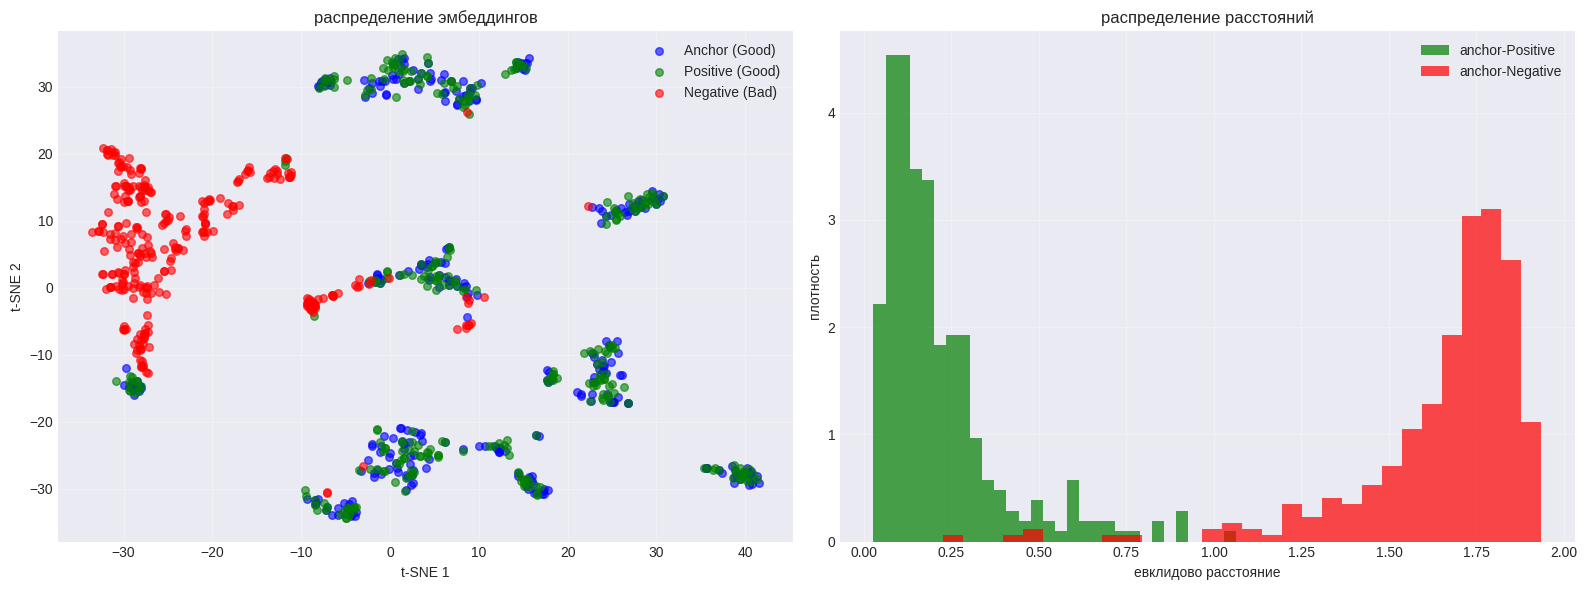


статистика расстояний:
anchor-Positive: mean=0.2142, std=0.1755
anchor-Negative: mean=1.6572, std=0.2487
разность средних: 1.4430

анализ косинусных расстояний:
косинусное сходство anchor-Positive: mean=0.9617, std=0.0735
косинусное сходство anchor-Negative: mean=-0.4040, std=0.3402
разность косинусных сходств: 1.3657


In [11]:
def visualize_embeddings_fixed(anchor_emb, positive_emb, negative_emb, num_samples=500):
    
    # визуализация
    print("\n" + " ")
    print("визуализация эмбеддигов")
    print(" ")
    
    # тензоры в numpy
    if isinstance(anchor_emb, torch.Tensor):
        anchor_emb_np = anchor_emb.cpu().numpy()
        positive_emb_np = positive_emb.cpu().numpy()
        negative_emb_np = negative_emb.cpu().numpy()
    else:
        anchor_emb_np = anchor_emb
        positive_emb_np = positive_emb
        negative_emb_np = negative_emb
    
    # подвыборка для визуализации
    n_total = min(len(anchor_emb_np), num_samples)
    indices = np.random.choice(len(anchor_emb_np), n_total, replace=False)
    
    anchor_sample = anchor_emb_np[indices]
    positive_sample = positive_emb_np[indices]
    negative_sample = negative_emb_np[indices]
    
    # объединие всех эмбеддингов
    all_embeddings = np.vstack([anchor_sample, positive_sample, negative_sample])
    labels = np.array([0]*n_total + [1]*n_total + [2]*n_total)
    label_names = ['Anchor (Good)', 'Positive (Good)', 'Negative (Bad)']
    
    print(f"применение t-SNE для {len(all_embeddings)} эмбеддингов")
    
    try:
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, init='pca')
    except TypeError:
        try:
            tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, init='pca')
        except TypeError:
            tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    
    embeddings_2d = tsne.fit_transform(all_embeddings)
    
    # визуализация
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    colors = ['blue', 'green', 'red']
    for i, (color, label_name) in enumerate(zip(colors, label_names)):
        mask = labels == i
        axes[0].scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                       c=color, label=label_name, alpha=0.6, s=30)
    
    axes[0].set_title('распределение эмбеддингов')
    axes[0].set_xlabel('t-SNE 1')
    axes[0].set_ylabel('t-SNE 2')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # гистограмма расстояний
    anchor_positive_dist = np.linalg.norm(anchor_sample - positive_sample, axis=1)
    anchor_negative_dist = np.linalg.norm(anchor_sample - negative_sample, axis=1)
    
    axes[1].hist(anchor_positive_dist, bins=30, alpha=0.7, color='green', 
                 label='anchor-Positive', density=True)
    axes[1].hist(anchor_negative_dist, bins=30, alpha=0.7, color='red', 
                 label='anchor-Negative', density=True)
    axes[1].set_xlabel('евклидово расстояние')
    axes[1].set_ylabel('плотность')
    axes[1].set_title('распределение расстояний')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nстатистика расстояний:")
    print(f"anchor-Positive: mean={anchor_positive_dist.mean():.4f}, std={anchor_positive_dist.std():.4f}")
    print(f"anchor-Negative: mean={anchor_negative_dist.mean():.4f}, std={anchor_negative_dist.std():.4f}")
    print(f"разность средних: {anchor_negative_dist.mean() - anchor_positive_dist.mean():.4f}")
    
    print("\nанализ косинусных расстояний:")
    anchor_tensor = torch.tensor(anchor_sample)
    positive_tensor = torch.tensor(positive_sample)
    negative_tensor = torch.tensor(negative_sample)
    
    cos_pos = F.cosine_similarity(anchor_tensor, positive_tensor).numpy()
    cos_neg = F.cosine_similarity(anchor_tensor, negative_tensor).numpy()
    
    print(f"косинусное сходство anchor-Positive: mean={cos_pos.mean():.4f}, std={cos_pos.std():.4f}")
    print(f"косинусное сходство anchor-Negative: mean={cos_neg.mean():.4f}, std={cos_neg.std():.4f}")
    print(f"разность косинусных сходств: {cos_pos.mean() - cos_neg.mean():.4f}")
    
    return embeddings_2d, labels

embeddings_2d, labels = visualize_embeddings_fixed(anchor_emb, positive_emb, negative_emb, num_samples=300)


 
анализ по категориям ошибок
 


анализ по категориям: 100%|██████████| 35/35 [00:00<00:00, 78.05it/s]



производительность по категориям семантических ошибок:
 
категория            accuracy   примеров   UIDs       Δ расстояние   
 
quantifiers          1.0000     412        4          1.4710         
binding              0.9915     587        6          1.3259         
control_raising      1.0000     541        5          1.5041         
npi_licensing        0.9970     660        7          1.2845         


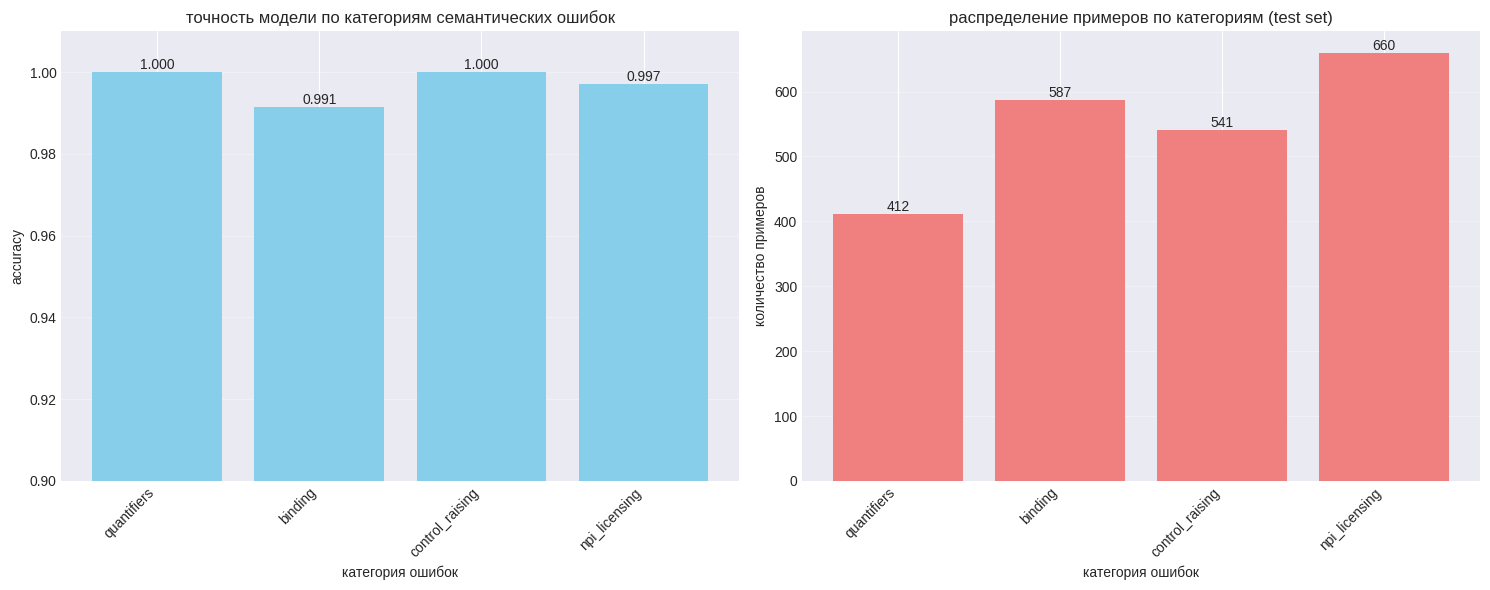

In [12]:
def analyze_model_performance_by_category(model, test_loader, tokenizer, test_df, device):

    print("\n" + " ")
    print("анализ по категориям ошибок")
    print(" ")
    
    model.eval()
    
    category_stats = {}
    
    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(test_loader, desc="анализ по категориям")):
            # получение данных
            anchor_ids = batch['anchor_ids'].to(device)
            anchor_mask = batch['anchor_mask'].to(device)
            positive_ids = batch['positive_ids'].to(device)
            positive_mask = batch['positive_mask'].to(device)
            negative_ids = batch['negative_ids'].to(device)
            negative_mask = batch['negative_mask'].to(device)
            
            # получение эмбеддингов
            anchor_emb = model(anchor_ids, anchor_mask)
            positive_emb = model(positive_ids, positive_mask)
            negative_emb = model(negative_ids, negative_mask)
            
            # вычисление accuracy для батча
            pos_sim = F.cosine_similarity(anchor_emb, positive_emb)
            neg_sim = F.cosine_similarity(anchor_emb, negative_emb)
            batch_correct = (pos_sim > neg_sim).cpu().numpy()
            
            for i in range(len(batch_correct)):
                df_idx = batch_idx * test_loader.batch_size + i
                if df_idx < len(test_df):
                    category = test_df.iloc[df_idx]['linguistics_term']
                    uid = test_df.iloc[df_idx]['UID']
                    
                    if category not in category_stats:
                        category_stats[category] = {
                            'total': 0,
                            'correct': 0,
                            'uids': set(),
                            'avg_pos_distance': [],
                            'avg_neg_distance': []
                        }
                    
                    category_stats[category]['total'] += 1
                    category_stats[category]['correct'] += int(batch_correct[i])
                    category_stats[category]['uids'].add(uid)
                    
                    # сохранение расстояния
                    pos_dist = 1 - pos_sim[i].item()
                    neg_dist = 1 - neg_sim[i].item()
                    category_stats[category]['avg_pos_distance'].append(pos_dist)
                    category_stats[category]['avg_neg_distance'].append(neg_dist)
    
    # вывод результатов
    print("\nпроизводительность по категориям семантических ошибок:")
    print(" " )
    print(f"{'категория':<20} {'accuracy':<10} {'примеров':<10} {'UIDs':<10} {'Δ расстояние':<15}")
    print(" ")
    
    for category, stats in category_stats.items():
        if stats['total'] > 0:
            accuracy = stats['correct'] / stats['total']
            avg_pos = np.mean(stats['avg_pos_distance'])
            avg_neg = np.mean(stats['avg_neg_distance'])
            distance_diff = avg_neg - avg_pos
            
            print(f"{category:<20} {accuracy:<10.4f} {stats['total']:<10} {len(stats['uids']):<10} {distance_diff:<15.4f}")
    
    # визуализация
    categories = list(category_stats.keys())
    accuracies = [stats['correct']/stats['total'] for stats in category_stats.values()]
    samples = [stats['total'] for stats in category_stats.values()]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # accuracy по категориям
    bars1 = axes[0].bar(range(len(categories)), accuracies, color='skyblue')
    axes[0].set_xlabel('категория ошибок')
    axes[0].set_ylabel('accuracy')
    axes[0].set_title('точность модели по категориям семантических ошибок')
    axes[0].set_xticks(range(len(categories)))
    axes[0].set_xticklabels(categories, rotation=45, ha='right')
    axes[0].set_ylim([0.9, 1.01])
    axes[0].grid(True, alpha=0.3, axis='y')
    
    for bar, acc in zip(bars1, accuracies):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{acc:.3f}', ha='center', va='bottom')
    
    bars2 = axes[1].bar(range(len(categories)), samples, color='lightcoral')
    axes[1].set_xlabel('категория ошибок')
    axes[1].set_ylabel('количество примеров')
    axes[1].set_title('распределение примеров по категориям (test set)')
    axes[1].set_xticks(range(len(categories)))
    axes[1].set_xticklabels(categories, rotation=45, ha='right')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    for bar, sample in zip(bars2, samples):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{sample}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return category_stats

category_stats = analyze_model_performance_by_category(model, test_loader, tokenizer, test_df, device)

In [13]:
class SemanticErrorDetector:
    
    # тесты
    def __init__(self, model, tokenizer, device, threshold=0.5):
        
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.threshold = threshold
        self.model.eval()
        
        # создание базы правильных предложений
        self.correct_sentences = []
        
    def add_correct_sentences(self, sentences):
       
        self.correct_sentences.extend(sentences)
        print(f"добавлено {len(sentences)} правильных предложений. Всего: {len(self.correct_sentences)}")
    
    def get_sentence_embedding(self, sentence):

        encoded = self.tokenizer.encode(sentence, max_length=64)
        
        with torch.no_grad():
            embedding = self.model(
                encoded['input_ids'].unsqueeze(0).to(self.device),
                encoded['attention_mask'].unsqueeze(0).to(self.device)
            )
        
        return embedding.cpu().numpy()
    
    def find_most_similar(self, query_sentence, top_k=5):

        if not self.correct_sentences:
            raise ValueError("база правильных предложений пуста!")
        
        query_emb = self.get_sentence_embedding(query_sentence)
        
        similarities = []
        for correct_sentence in self.correct_sentences:
            correct_emb = self.get_sentence_embedding(correct_sentence)
            sim = np.dot(query_emb, correct_emb.T) / (
                np.linalg.norm(query_emb) * np.linalg.norm(correct_emb)
            )
            similarities.append((correct_sentence, sim[0][0]))
        
        similarities.sort(key=lambda x: x[1], reverse=True)
        
        return similarities[:top_k]
    
    def detect_error(self, sentence, reference_sentence=None):

        # детектирование ошибки в предложении
        if reference_sentence:
            emb1 = self.get_sentence_embedding(sentence)
            emb2 = self.get_sentence_embedding(reference_sentence)
            similarity = np.dot(emb1, emb2.T) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
            similarity = similarity[0][0]
            
            if similarity < self.threshold:
                return {
                    'has_error': True,
                    'similarity': similarity,
                    'message': f"обнаружена семантическая ошибка, сходство: {similarity:.3f}"
                }
            else:
                return {
                    'has_error': False,
                    'similarity': similarity,
                    'message': f"ошибок не обнаружено, сходство: {similarity:.3f}"
                }
        else:
            most_similar = self.find_most_similar(sentence, top_k=1)[0]
            similar_sentence, similarity = most_similar
            
            if similarity < self.threshold:
                return {
                    'has_error': True,
                    'similarity': similarity,
                    'most_similar': similar_sentence,
                    'message': f"обнаружена ошибка, наиболее похожее: '{similar_sentence[:50]}...'"
                }
            else:
                return {
                    'has_error': False,
                    'similarity': similarity,
                    'most_similar': similar_sentence,
                    'message': f"ошибок не обнаружено, сходство: {similarity:.3f}"
                }

detector = SemanticErrorDetector(model, tokenizer, device, threshold=0.5)

correct_sentences = list(train_df['sentence_good'].sample(1000, random_state=42))
detector.add_correct_sentences(correct_sentences)

print("\n" + " ")
print("тест детектора ощибок")
print(" ")

test_cases = [
    ("The teenager does tour at most nine restaurants.",  # good
     "No teenager does tour at most nine restaurants."),   # bad
    ("Every senator notices at most four windows.",        # good
     "No senator notices at most four windows."),          # bad
    ("The doctor brought at most eight gates.",            # good
     "No doctor brought at most eight gates."),            # bad
]

for good, bad in test_cases:
    print(f"\тест:")
    print(f"good: {good}")
    print(f"bad: {bad}")
    
    result_good = detector.detect_error(good)
    print(f"good -> {result_good['message']}")
    
    result_bad = detector.detect_error(bad)
    print(f"bad -> {result_bad['message']}")

добавлено 1000 правильных предложений. Всего: 1000

 
тест детектора ощибок
 
\тест:
good: The teenager does tour at most nine restaurants.
bad: No teenager does tour at most nine restaurants.
good -> ошибок не обнаружено, сходство: 0.999
bad -> обнаружена ошибка, наиболее похожее: 'Ruth can not ever say a government predicted these...'
\тест:
good: Every senator notices at most four windows.
bad: No senator notices at most four windows.
good -> ошибок не обнаружено, сходство: 0.999
bad -> обнаружена ошибка, наиболее похожее: 'Ruth can not ever say a government predicted these...'
\тест:
good: The doctor brought at most eight gates.
bad: No doctor brought at most eight gates.
good -> ошибок не обнаружено, сходство: 0.999
bad -> обнаружена ошибка, наиболее похожее: 'Ruth can not ever say a government predicted these...'


In [14]:
class ImprovedSemanticErrorDetector:

    # улучшение детекторa семантических ошибок
    
    def __init__(self, model, tokenizer, device, similarity_threshold=0.7, 
                 diversity_threshold=0.3):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.similarity_threshold = similarity_threshold
        self.diversity_threshold = diversity_threshold
        
        self.correct_sentences_by_category = {}
        self.all_correct_sentences = []
        
        self.model.eval()
    
    def add_correct_sentences_with_categories(self, df):
        
        for _, row in df.iterrows():
            sentence = row['sentence_good']
            category = row['linguistics_term']
            
            if category not in self.correct_sentences_by_category:
                self.correct_sentences_by_category[category] = []
            
            self.correct_sentences_by_category[category].append(sentence)
            self.all_correct_sentences.append(sentence)
        
        print(f"добавлено {len(self.all_correct_sentences)} предложений")
        print(f"категории: {list(self.correct_sentences_by_category.keys())}")
        print(f"предложений по категориям:")
        for category, sentences in self.correct_sentences_by_category.items():
            print(f"  {category}: {len(sentences)}")
    
    def get_sentence_embedding(self, sentence):

        encoded = self.tokenizer.encode(sentence, max_length=64)
        
        with torch.no_grad():
            embedding = self.model(
                encoded['input_ids'].unsqueeze(0).to(self.device),
                encoded['attention_mask'].unsqueeze(0).to(self.device)
            )
        
        return embedding.cpu().numpy()
    
    def find_most_similar_by_category(self, query_sentence, top_k=3):

        query_emb = self.get_sentence_embedding(query_sentence)
        
        all_similarities = []
        
        for category, sentences in self.correct_sentences_by_category.items():
            for correct_sentence in sentences[:100]:  
                correct_emb = self.get_sentence_embedding(correct_sentence)
                
                similarity = np.dot(query_emb, correct_emb.T)[0][0] / (
                    np.linalg.norm(query_emb) * np.linalg.norm(correct_emb)
                )
                
                all_similarities.append({
                    'sentence': correct_sentence,
                    'similarity': float(similarity),
                    'category': category
                })
        
        all_similarities.sort(key=lambda x: x['similarity'], reverse=True)
        
        top_results = []
        seen_sentences = set()
        
        for result in all_similarities:
            if result['sentence'] not in seen_sentences:
                top_results.append(result)
                seen_sentences.add(result['sentence'])
            if len(top_results) >= top_k:
                break
        
        return top_results
    
    def detect_error_with_explanation(self, sentence):

        if not self.all_correct_sentences:
            return {
                'has_error': None,
                'message': 'база правильных предложений пуста'
            }
        
        # наиболее похожие предложения
        similar_sentences = self.find_most_similar_by_category(sentence, top_k=3)
        
        if not similar_sentences:
            return {
                'has_error': True,
                'message': 'не найдено похожих правильных предложений'
            }
        
        best_match = similar_sentences[0]
        
        if best_match['similarity'] >= self.similarity_threshold:
            return {
                'has_error': False,
                'similarity': best_match['similarity'],
                'most_similar': best_match['sentence'],
                'category': best_match['category'],
                'message': f"ошибок не обнаружено, сходство: {best_match['similarity']:.3f}",
                'all_similar': similar_sentences[:3]  
            }
        else:
            # анализ почему это ошибка
            explanation = self._generate_error_explanation(sentence, best_match)
            
            return {
                'has_error': True,
                'similarity': best_match['similarity'],
                'most_similar': best_match['sentence'],
                'category': best_match['category'],
                'explanation': explanation,
                'message': f"обнаружена семантическая ошибка, сходство: {best_match['similarity']:.3f}",
                'suggestion': self._generate_correction_suggestion(sentence, best_match),
                'all_similar': similar_sentences[:3]  
            }
    
    def _generate_error_explanation(self, query_sentence, best_match):
  
        # объяснения

        query_words = set(query_sentence.lower().split())
        match_words = set(best_match['sentence'].lower().split())
        
        added_words = query_words - match_words
        removed_words = match_words - query_words
        
        explanation = f"категория ошибки: {best_match['category']}\n"
        
        if added_words:
            explanation += f"добавлены слова: {', '.join(list(added_words)[:5])}\n"
        if removed_words:
            explanation += f"удалены слова: {', '.join(list(removed_words)[:5])}\n"
        
        return explanation
    
    def _generate_correction_suggestion(self, query_sentence, best_match):
        return f"рекомендации: {best_match['sentence']}"

improved_detector = ImprovedSemanticErrorDetector(
    model, tokenizer, device, 
    similarity_threshold=0.8,  
    diversity_threshold=0.4
)

improved_detector.add_correct_sentences_with_categories(train_df.sample(500, random_state=42))

# тест
test_cases = [
    ("The teenager does tour at most nine restaurants.", "quantifiers"),
    ("No teenager does tour at most nine restaurants.", "quantifiers"),
    ("Every senator notices at most four windows.", "quantifiers"),
    ("No senator notices at most four windows.", "quantifiers"),
    ("The doctor brought at most eight gates.", "quantifiers"),
    ("No doctor brought at most eight gates.", "quantifiers"),
    ("No teacher assigned more than five tasks.", "quantifiers")
]

for sentence, expected_category in test_cases:
    print(f"\n{''}")
    print(f"тест: {sentence}")
    
    result = improved_detector.detect_error_with_explanation(sentence)
    
    print(f"результат: {result['message']}")
    
    if result['has_error'] is not None:
        print(f"категория похожего: {result.get('category', 'N/A')}")
        
        if 'all_similar' in result:
            print("\nтоп похожих предложений:")
            for i, sim in enumerate(result['all_similar'][:2], 1):
                print(f"  {i}. [{sim['category']}] {sim['sentence'][:50]}... (сходство: {sim['similarity']:.3f})")

добавлено 500 предложений
категории: ['binding', 'npi_licensing', 'quantifiers', 'control_raising']
предложений по категориям:
  binding: 143
  npi_licensing: 162
  quantifiers: 93
  control_raising: 102


тест: The teenager does tour at most nine restaurants.
результат: ошибок не обнаружено, сходство: 0.999
категория похожего: quantifiers

топ похожих предложений:
  1. [quantifiers] That pedestrian knows at least five guests.... (сходство: 0.999)
  2. [quantifiers] Some child would cure at most ten hamsters.... (сходство: 0.999)


тест: No teenager does tour at most nine restaurants.
результат: обнаружена семантическая ошибка, сходство: 0.037
категория похожего: npi_licensing

топ похожих предложений:
  1. [npi_licensing] Ruth can not ever say a government predicted these... (сходство: 0.037)
  2. [npi_licensing] Sherry had not ever remembered who wasn't arriving... (сходство: -0.123)


тест: Every senator notices at most four windows.
результат: ошибок не обнаружено, сходство: 0.998


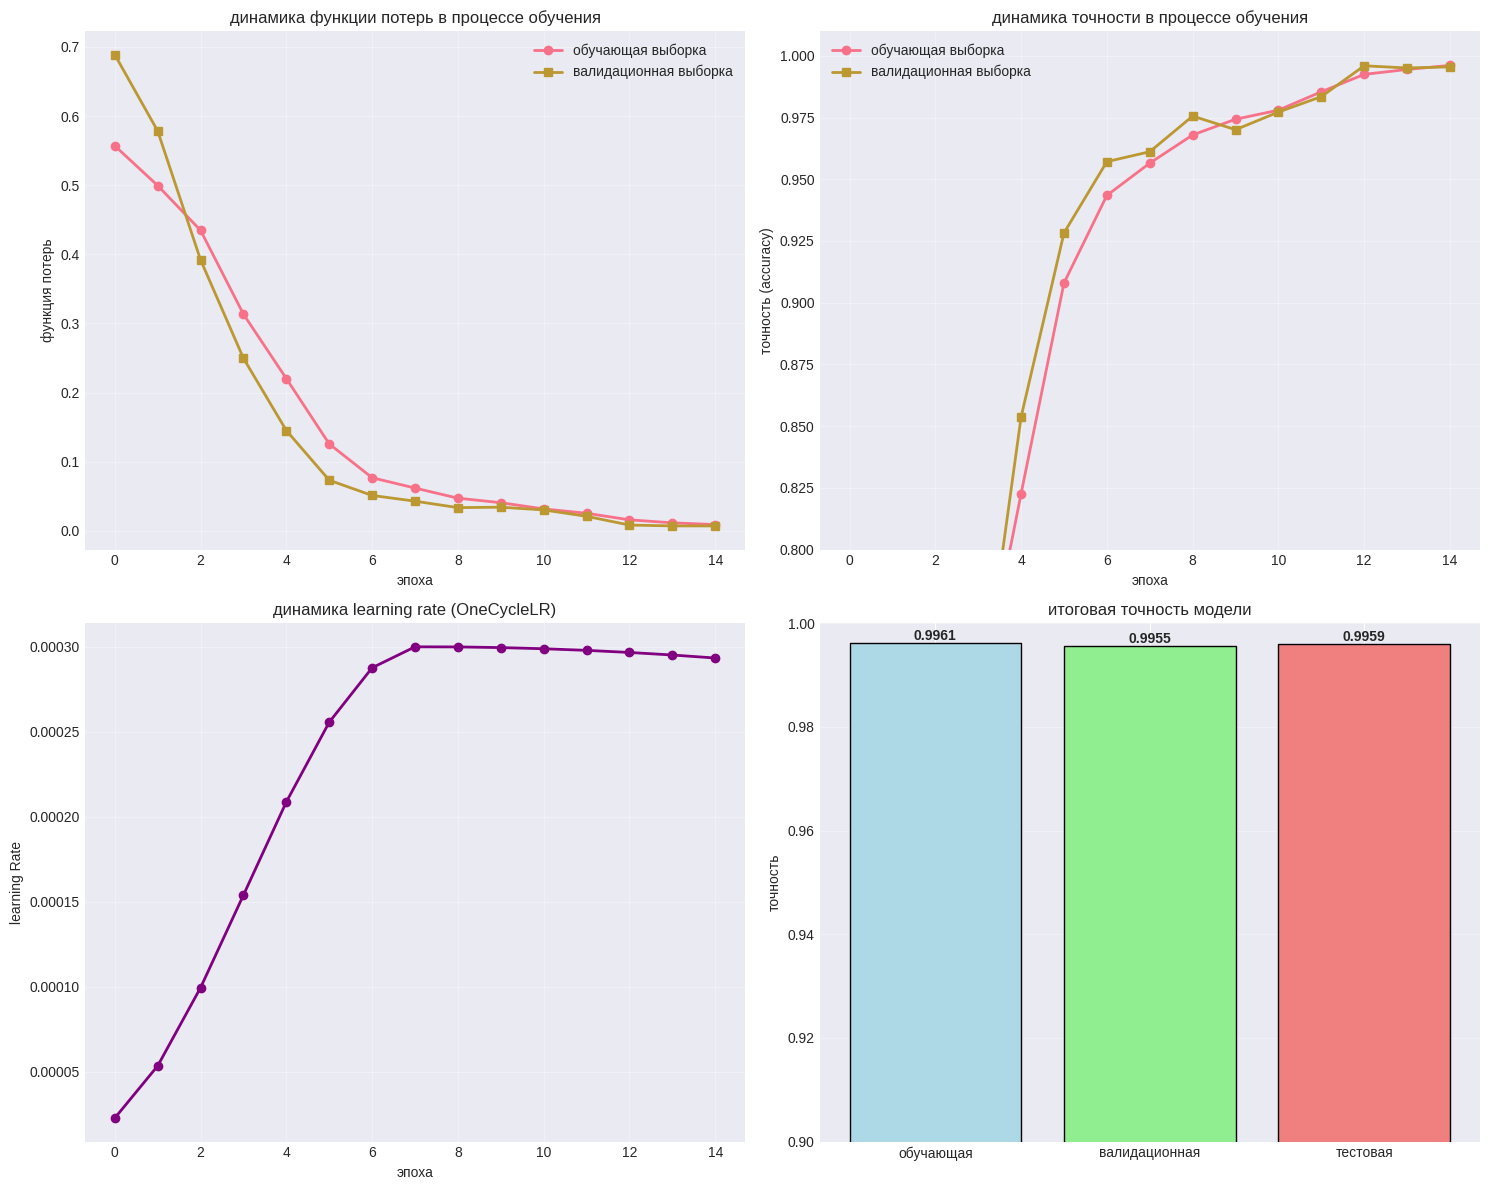

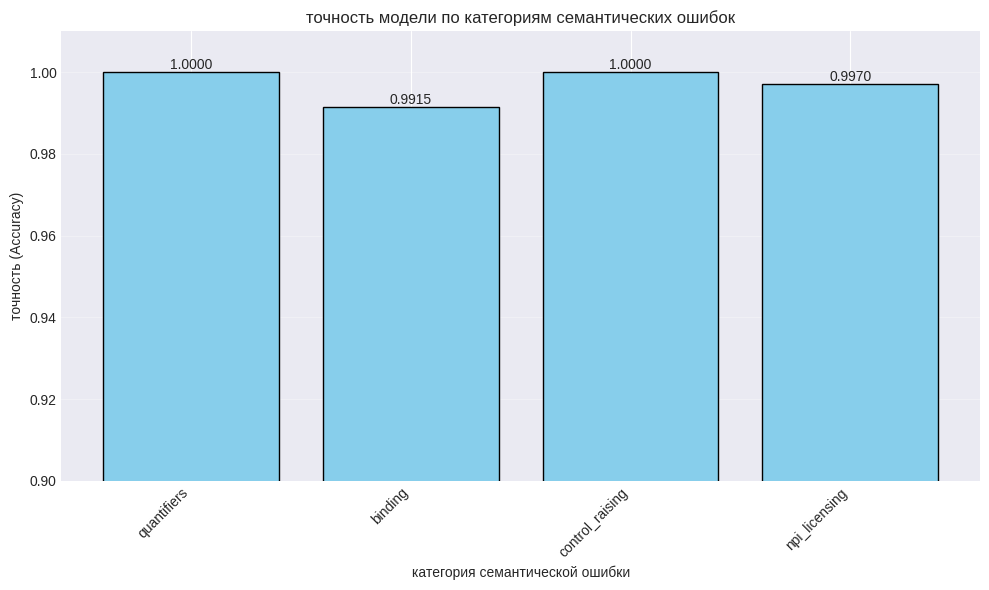

                          метрика  значение
    точность на обучающей выборке    0.9961
точность на валидационной выборке    0.9955
     точность на тестовой выборке    0.9959
 финальная функция потерь (train)    0.0091
   финальная функция потерь (val)    0.0071
         количество эпох обучения        15
        размер модели (параметры) 2,529,120
                   размер словаря     3,323

сохранены в results_summary.csv
сохранены в training_results_final.png и accuracy_by_category.png


In [15]:
def create_final_diploma_plots(history, test_accuracy, category_stats):

    
    # график обучения
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # loss
    axes[0, 0].plot(history['train_loss'], label='обучающая выборка', marker='o', linewidth=2)
    axes[0, 0].plot(history['val_loss'], label='валидационная выборка', marker='s', linewidth=2)
    axes[0, 0].set_xlabel('эпоха')
    axes[0, 0].set_ylabel('функция потерь')
    axes[0, 0].set_title('динамика функции потерь в процессе обучения')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # accuracy
    axes[0, 1].plot(history['train_acc'], label='обучающая выборка', marker='o', linewidth=2)
    axes[0, 1].plot(history['val_acc'], label='валидационная выборка', marker='s', linewidth=2)
    axes[0, 1].set_xlabel('эпоха')
    axes[0, 1].set_ylabel('точность (аccuracy)')
    axes[0, 1].set_title('динамика точности в процессе обучения')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim([0.8, 1.01])
    
    # learning rate
    axes[1, 0].plot(history['lr'], marker='o', color='purple', linewidth=2)
    axes[1, 0].set_xlabel('эпоха')
    axes[1, 0].set_ylabel('learning Rate')
    axes[1, 0].set_title('динамика learning rate (OneCycleLR)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # итоговая accuracy
    metrics = ['обучающая', 'валидационная', 'тестовая']
    values = [history['train_acc'][-1], history['val_acc'][-1], test_accuracy]
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    
    bars = axes[1, 1].bar(metrics, values, color=colors, edgecolor='black')
    axes[1, 1].set_ylabel('точность')
    axes[1, 1].set_title('итоговая точность модели')
    axes[1, 1].set_ylim([0.9, 1.0])
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{value:.4f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('training_results_final.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # график по категориям ошибок
    if category_stats:
        categories = list(category_stats.keys())
        accuracies = [stats['correct']/stats['total'] for stats in category_stats.values()]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(len(categories)), accuracies, color='skyblue', edgecolor='black')
        plt.xlabel('категория семантической ошибки')
        plt.ylabel('точность (Accuracy)')
        plt.title('точность модели по категориям семантических ошибок')
        plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
        plt.ylim([0.9, 1.01])
        plt.grid(True, alpha=0.3, axis='y')
        
        for bar, acc in zip(bars, accuracies):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{acc:.4f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig('accuracy_by_category.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    
    summary_table = pd.DataFrame({
        'метрика': [
            'точность на обучающей выборке',
            'точность на валидационной выборке', 
            'точность на тестовой выборке',
            'финальная функция потерь (train)',
            'финальная функция потерь (val)',
            'количество эпох обучения',
            'размер модели (параметры)',
            'размер словаря'
        ],
        'значение': [
            f"{history['train_acc'][-1]:.4f}",
            f"{history['val_acc'][-1]:.4f}",
            f"{test_accuracy:.4f}",
            f"{history['train_loss'][-1]:.4f}",
            f"{history['val_loss'][-1]:.4f}",
            f"{len(history['train_acc'])}",
            f"{sum(p.numel() for p in model.parameters()):,}",
            f"{tokenizer.get_vocab_size():,}"
        ]
    })
    
    print(summary_table.to_string(index=False))
    
    summary_table.to_csv('results_summary.csv', index=False)
    print("\nсохранены в results_summary.csv")
    print("сохранены в training_results_final.png и accuracy_by_category.png")

create_final_diploma_plots(history, test_accuracy, category_stats)